In [1]:
using PyPlot

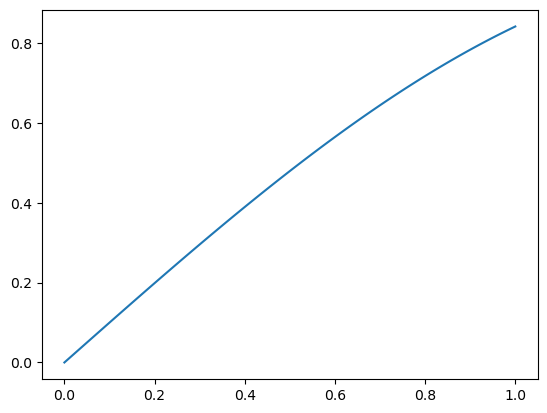

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1367aee10>

In [3]:
xs = collect(0:0.01:1)
plot(xs, sin.(xs))

In [9]:
function trap_integrate(f, a, b, N)
    dx = (b-a)/N
    sum = zero(dx)
    for i in 1:N-1
        sum += 2*f(a + dx*i)
    end
    sum += f(a) + f(b)
    return dx*sum/2
end

trap_integrate (generic function with 1 method)

In [11]:
trap_integrate(exp, 0, 1, 100), exp(1)-1

(1.7182961474504175, 1.718281828459045)

In [12]:
trap_integrate(exp, 0, 1, 100)-(exp(1)-1)

1.4318991372386236e-5

In [13]:
trap_integrate(exp, 0, 1, 200)-(exp(1)-1)

3.5797523181280155e-6

In [14]:
3.6e-6/1.4e-5

0.2571428571428571

In [15]:
function trap_integrate(ys, xs)
    return 0.5*sum((ys[2:end] .+ ys[1:end-1]).*(xs[2:end] .- xs[1:end-1])) 
end

trap_integrate (generic function with 2 methods)

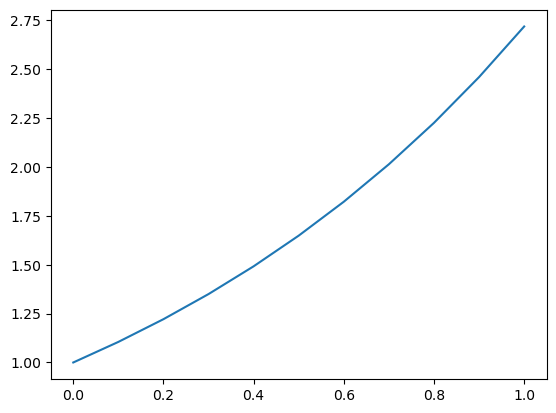

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12b453f98>

In [16]:
xs = collect(0:0.1:1)
ys = exp.(xs)

plot(xs, ys)

In [17]:
trap_integrate(ys, xs)

1.7197134913893146

In [18]:
import Test: @test

In [21]:
@test isapprox(trap_integrate(ys, xs), exp(1)-1, rtol=1e-2)

Test Passed

In [22]:
function E(z)
    return sqrt(0.3*(1+z)^3 + 0.7)
end

E (generic function with 1 method)

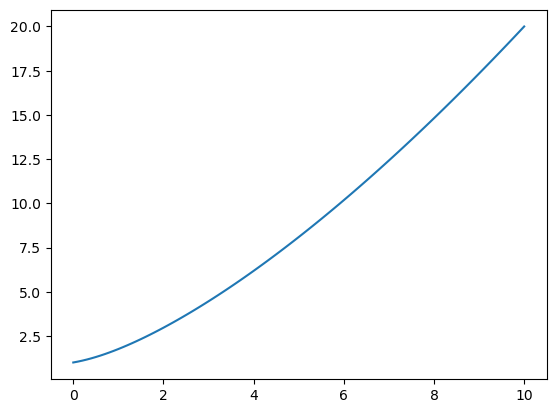

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1366eada0>

In [23]:
zs = collect(0:0.1:10)
plot(zs, E.(zs))

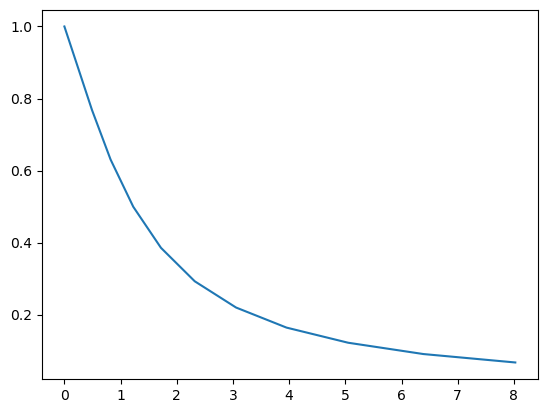

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x138eab208>

In [27]:
log1pzs = collect(0:0.2:log(1+10))
zs = expm1.(log1pzs)
invEfunc = 1 ./ E.(zs)
plot(zs, invEfunc)

In [26]:
trap_integrate(invEfunc, zs)

2.1530180144443873

In [28]:
trap_integrate(invEfunc, zs)

2.104923895067389

In [31]:
function trap_adaptive(f, a, b, atol)
    dx = (b-a)/4
    Ifine = 0.5*dx*(f(a) + 2*f(a + dx) + 2*f(a + 2*dx) + 2*f(a + 3*dx) + f(b))
    Irough = 0.5*dx*(f(a) + 2*f(a + 2*dx) + f(b))
    
    error = abs(Ifine - Irough)
    
    if error < atol
        return Ifine
    else
        return trap_adaptive(f, a, (a+b)/2, atol) + trap_adaptive(f, (a+b)/2, b, atol)
    end
end

trap_adaptive (generic function with 1 method)

In [32]:
trap_adaptive(exp, 0, 1, 1e-4)

1.7182818285295491

In [33]:
exp(1)-1

1.718281828459045

In [34]:
function damped_exponential(x)
    return exp(-x/10)*sin(2*pi*x)
end

damped_exponential (generic function with 1 method)

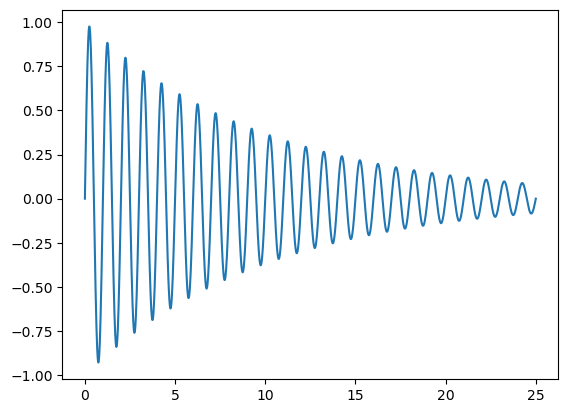

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1390ceb38>

In [35]:
x = collect(0:0.01:25)
plot(x, damped_exponential.(x))

In [36]:
trap_adaptive(damped_exponential, 0, 25, 1e-3)

0.14508037749104868